In [1]:
# IMPORTACIÓN DE LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Laboratorio 1**

## **Series de tiempo**

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


### **1. Leer el dataset desde el github.**

In [435]:
df = pd.read_csv(f"https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')].copy() # Eliminamos Unnamed
df.time = pd.to_datetime(df.time) # Corregimos el tipo de dato tiempo
df.head()

,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


### **2. Definir como indice la columna time.**

In [436]:
df.set_index('time', inplace=True) # Con el método set_index se puede hacer rápidamente
df.head()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


### **3. Obtenga información del data frame.**

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


In [438]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


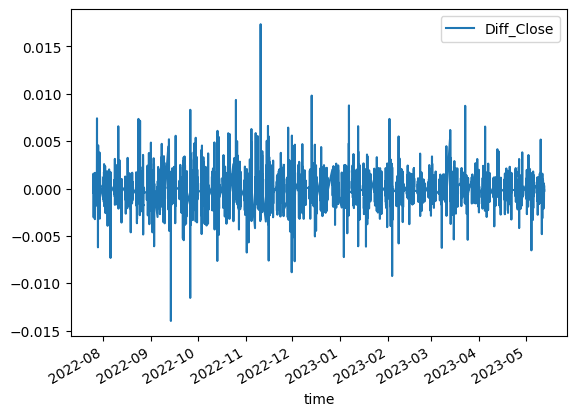

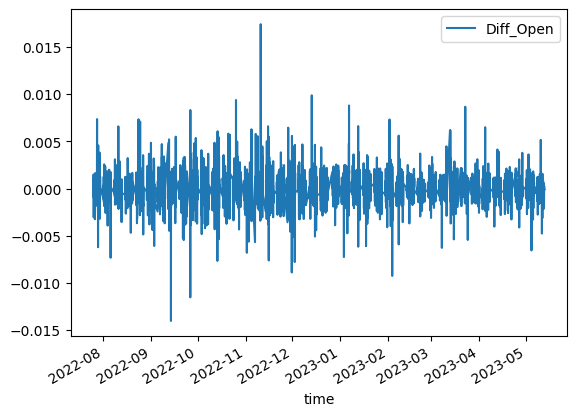

In [439]:
# INFORMACIÓN GRÁFICA DEL DATASET

df.plot(y='Diff_Close')
df.plot(y='Diff_Open')
plt.show()

### **4. Determine si hay null, nan en el data frame.**

In [440]:
df.isnull().sum()

open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

### **5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.**

In [441]:
PascalCase = lambda s: s.title().replace('_', '') # Construimos una función que convierta cualquier string
df.rename(mapper = PascalCase, axis="columns", inplace=True) # La aplicamos en todas las columnas
df.head()

,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


### **6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:**

- En este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la columna DiffClose construya un histograma de los datos.

In [442]:
# Restringimos los datos

data = df[['Close', 'DiffClose']].copy()
data.head()

,Close,DiffClose
time,,
2022-07-25 13:00:00,1.02345,-0.00046
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304


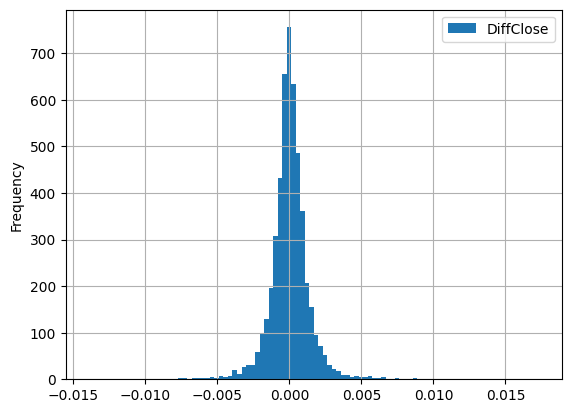

In [443]:
# Observamos la distribución

data.plot(kind='hist', y='DiffClose', bins=100)
plt.grid()

- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.

Fitting 5 distributions: 100%|██████████| 5/5 [00:01<00:00,  4.16it/s]


(9485.357892430526,
 18261.602379754644,
 -0.1681187469347585,
 0.4918236500726647)

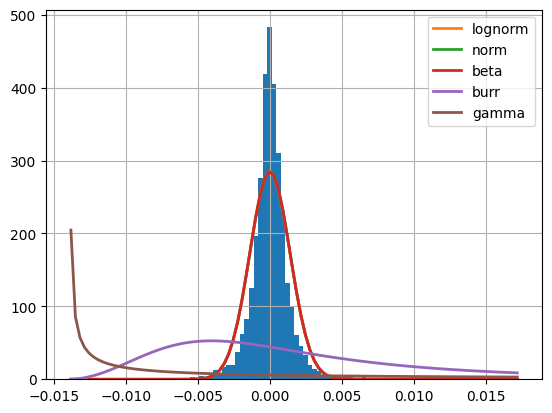

In [444]:
# AJUSTAMOS LA DISTRIBUCIÓN

from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data['DiffClose'],
           distributions=['gamma',
                          'lognorm',
                          'beta',
                          'burr',
                          'norm'])
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

### **7. Para el data frame, seleccionemos solo los datos del 2023.**

In [445]:
df_2023 = data[data.index.year == 2023] # Filtramos por 2023
df_2023.head()

,Close,DiffClose
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016


### **8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes**

In [446]:
mean_days = data.groupby(pd.Grouper(freq='15D')).mean()
mean_week = data.groupby(pd.Grouper(freq='1W')).mean()
mean_month = data.groupby(pd.Grouper(freq='1M')).mean()

### **9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:**

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```

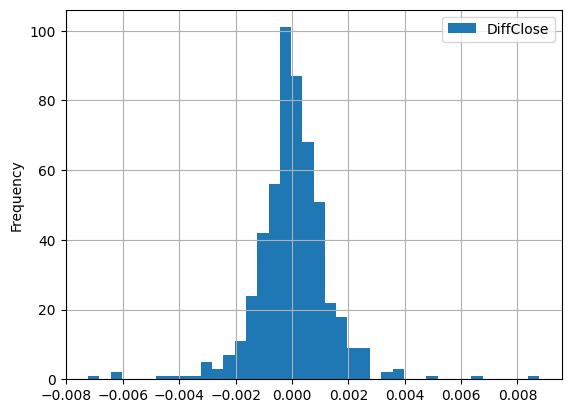

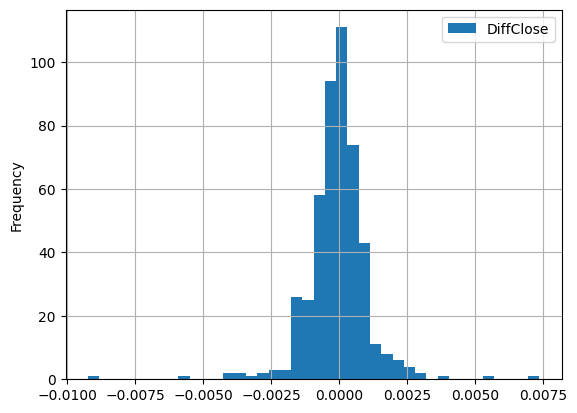

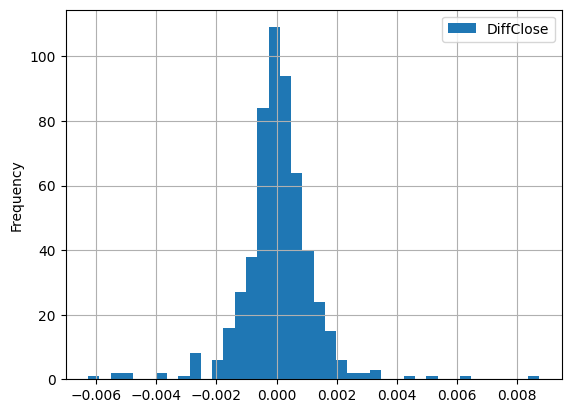

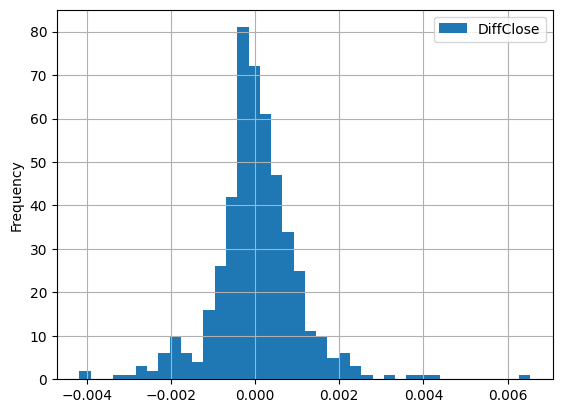

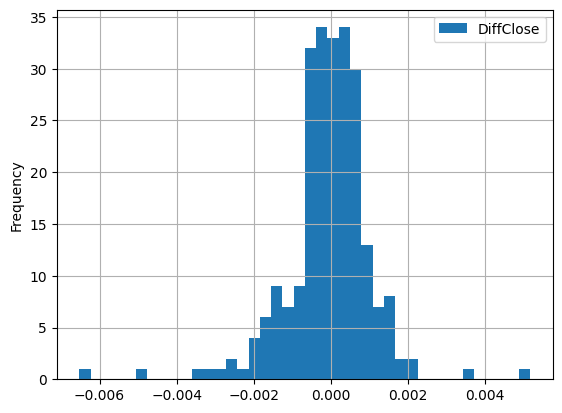

In [447]:
q = df_2023.groupby(pd.Grouper(freq='1M'))

for group in q:
    group[1].plot(kind='hist', y='DiffClose', bins=40)
    plt.grid()

## **Análisis de datos con Pandas**

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:

### **1. Leer los datos desde una página web.**

In [448]:
# OBTENEMOS LOS DATOS TAL COMO SE INDICA EN EL RECURSO

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

### **2. Renombrar las columnas en formato PascalCase.**

In [449]:
features_df = X.copy()
targets_df = y.copy()

In [450]:
features_df.rename(mapper = PascalCase, axis="columns", inplace=True)

### **3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.**

In [451]:
features_df.head(3)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [452]:
features_df.tail(3)

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [453]:
features_df.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [454]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

### **4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`.Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?**

In [455]:
features_df.isnull().sum()

Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
dtype: int64

### **5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método `unique()` para mostrar estos valores.**

In [456]:
targets_df.Diagnosis.unique()

array(['M', 'B'], dtype=object)

### **6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:**

```python
import seaborn as sns
sns.countplot?
```

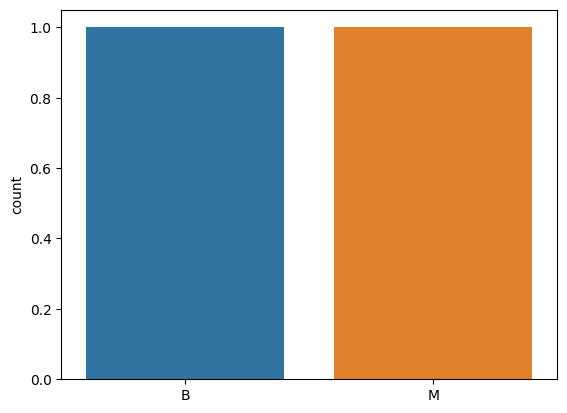

In [457]:
sns.countplot(data=targets_df, x=['B', 'M'])
plt.show()

### **7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).**

In [458]:
targets_df.shape[0] # Observamos cuántas filas hay

569

In [459]:
targets_df['DiagnosisNumeric'] = pd.Series([])

c:\Users\sebas\002_EstudiantesAprendizajeEstadistico\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
# Aplicamos las condiciones adecuadas para crear el hotencode de M y B

for i in range(targets_df.shape[0]):
    if targets_df.Diagnosis[i] == "B":
        targets_df['DiagnosisNumeric'][i] = int(0)
    if targets_df.Diagnosis[i] == "M":
        targets_df['DiagnosisNumeric'][i] = int(1)

c:\Users\sebas\002_EstudiantesAprendizajeEstadistico\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\sebas\002_EstudiantesAprendizajeEstadistico\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [461]:
targets_df

,Diagnosis,DiagnosisNumeric
0,M,1.0
1,M,1.0
2,M,1.0
3,M,1.0
4,M,1.0
...,...,...
564,M,1.0
565,M,1.0
566,M,1.0
567,M,1.0


### **8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:** 
   `(x - mean(x)) / std(x)`

In [462]:
# Se puede hacer directamente con apply

features_df = features_df.apply(lambda col: (col - col.mean()) / col.std(), axis=0)
# Features_df = features_df.apply(lambda col: abs( (col - col.mean()) / col.std() ), axis=0)

In [463]:
features_df.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


### **9. Agrupar características similares y calcular su promedio. Para las siguientes características:**

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.

In [464]:
# Definimos la lista de prefijos

prefijos = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness',
            'Compactness',  'Concavity', 'ConcavePoints', 'Symmetry', 'FractalDimension']

In [465]:
for i in range(len(prefijos)):
    # Para cada columna del dataframe verificamos si empieza con cada prefijo
    cols = [c for c in features_df.columns if c.startswith(prefijos[i])]
    # Creamos las columnas prefijo + Mean
    features_df[prefijos[i]+"Mean"] = features_df[cols].mean(axis=1)

In [466]:
features_df.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272


### **10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.**

In [467]:
# Primero, mergeemos los datos

df = pd.concat([features_df, targets_df], axis=1)
df.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean,Diagnosis,DiagnosisNumeric
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454,M,1.0
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767,M,1.0
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286,M,1.0
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995,M,1.0
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272,M,1.0


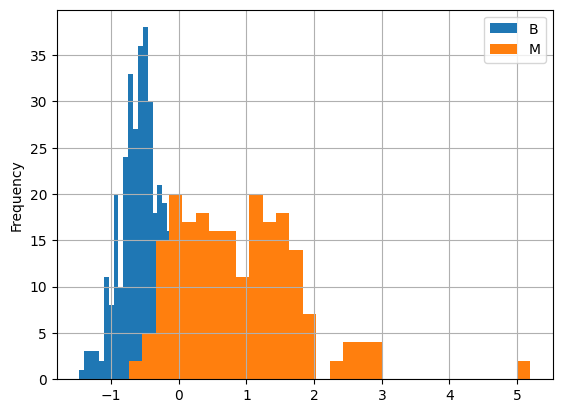

In [468]:
# Creamos el histograma de RadiusMean separado por Diagnosis

df.groupby('Diagnosis')['RadiusMean'].plot(kind='hist', bins=30, legend=True)
plt.grid()
plt.show()

### **11. Generar gráficos de violín para múltiples características. Para las columnas:**

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

In [469]:
# Unimos las columnas Diagnosis con las columnas Mean para usar melt

df = pd.concat([df[['Diagnosis']], df.iloc[:, 28:38]], axis=1)
df.head()

,Diagnosis,Symmetry3,FractalDimension3,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean
0,M,2.748204,1.935312,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182
1,M,-0.243675,0.280943,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241
2,M,1.151242,0.201214,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099
3,M,6.040726,4.930672,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444
4,M,-0.867590,-0.396751,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685


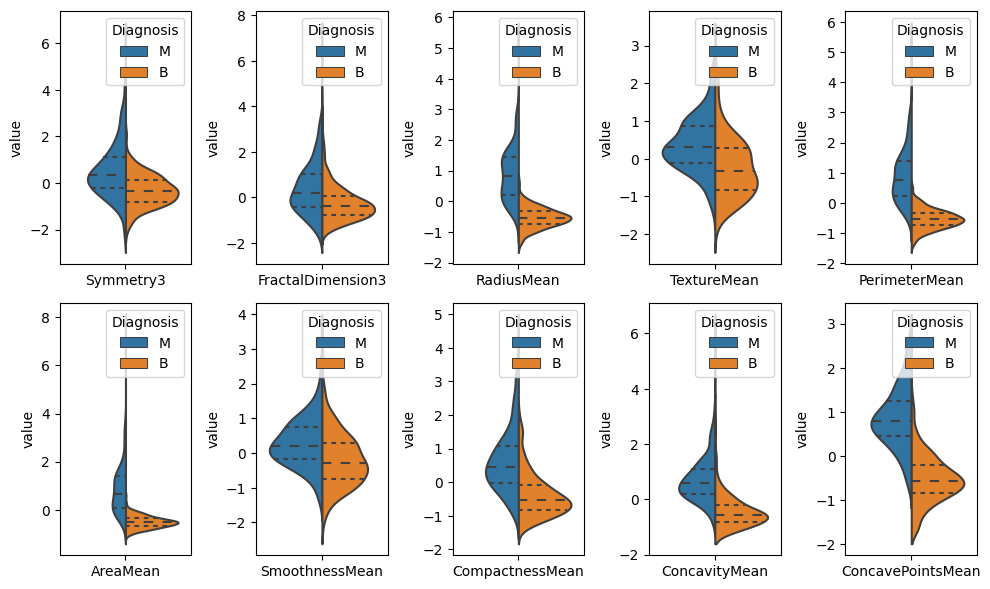

In [481]:
# Usamos melt como se sugiere
data = pd.melt(df.iloc[:, 0:11], id_vars="Diagnosis", var_name="features", value_name="value")

# Extraemos las características y definimos dimensiones
features = data["features"].unique().tolist()
ncols = 5
nrows = 2

# Creamos las figuras
figs, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*3), sharey=False)

# Iteramos para cada característica y graficamos el violinplot
for i, feat in enumerate(features):
    ax = axes.flat[i]
    sub = data[data["features"] == feat]
    sns.violinplot(x="features", y="value", data=sub, hue="Diagnosis", inner="quart", split=True, ax=ax)
    
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels())

# Una leyenda común
handles, labels = ax.get_legend_handles_labels()

plt.tight_layout()
plt.show()

### **12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.**

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

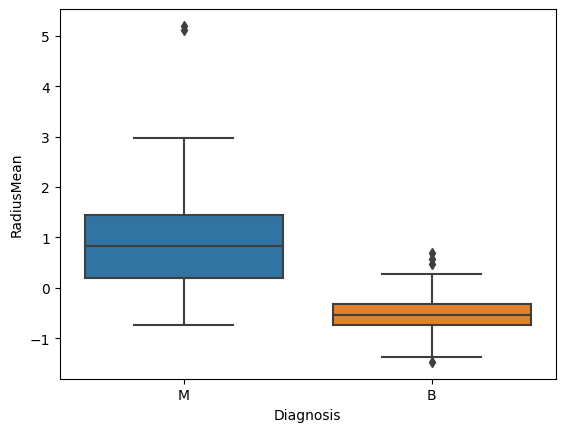

In [ ]:
# Creamos los boxplots

sns.boxplot(data=df, x="Diagnosis", y="RadiusMean")
plt.show()

In [484]:
Q1 = df['RadiusMean'].quantile(0.25) # Calculamos el primer cuantil
Q3 = df['RadiusMean'].quantile(0.75) # Calculamos el tercer cuantil
IQR = Q3 - Q1 # Calculamos el rango intercuartílico
df_RM = df[~((df['RadiusMean'] < (Q1 - 1.5 * IQR)) | (df['RadiusMean'] > (Q3 + 1.5 * IQR)))] # Filtramos
df_RM.head()

,Diagnosis,Symmetry3,FractalDimension3,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean
0,M,2.748204,1.935312,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182
1,M,-0.243675,0.280943,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241
2,M,1.151242,0.201214,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099
3,M,6.040726,4.930672,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444
4,M,-0.867590,-0.396751,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685


In [485]:
print(f"Tamaño original: {df.shape}")
print(f"Tamaño sin outliers de RadiusMean: {df_RM.shape}")

Tamaño original: (569, 11)
Tamaño sin outliers de RadiusMean: (547, 11)


### **13. Encontrar la matriz de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.**

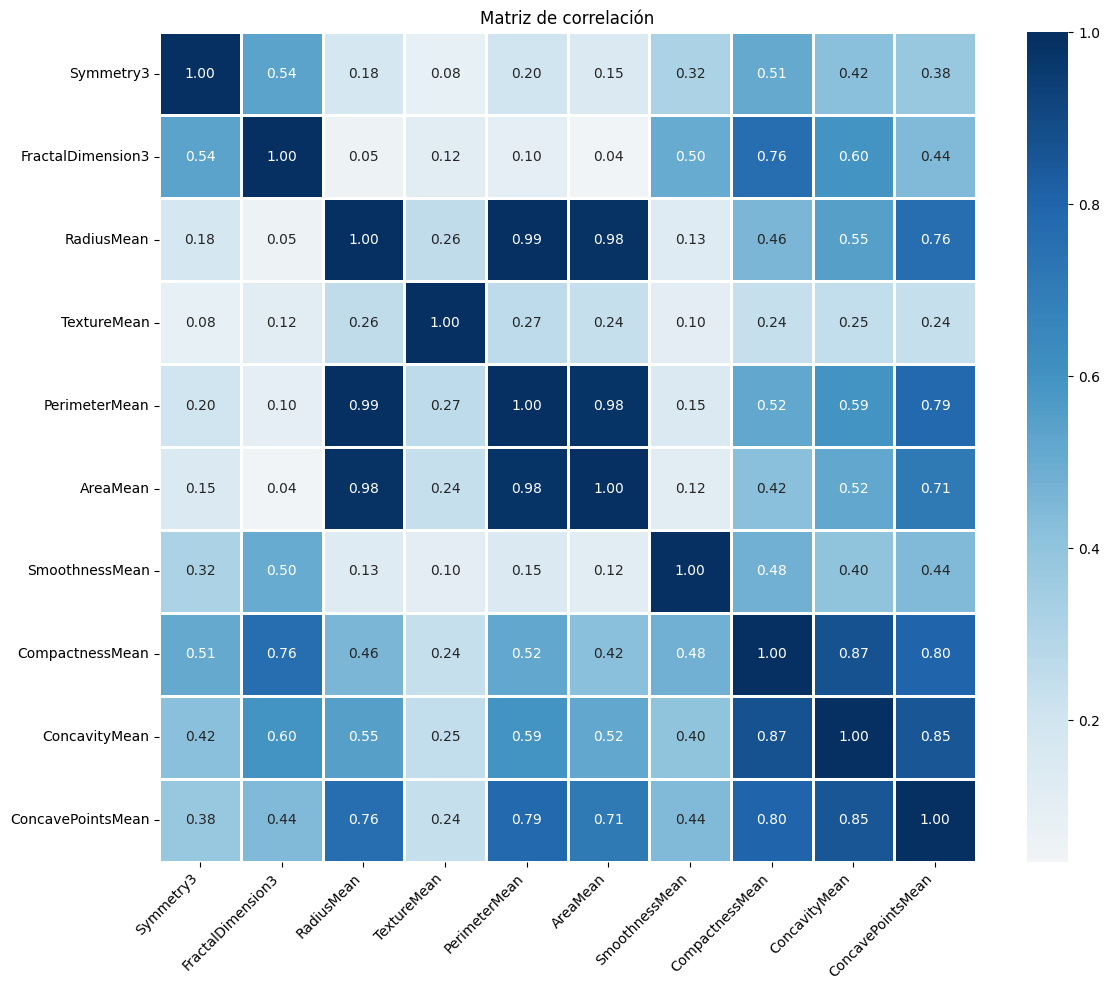

In [ ]:
plt.figure(figsize=(12, 10))

# Gráfico del HeatMap
sns.heatmap(
    data=df.corr(),     # Calculamos la matriz de correlación
    annot=True,         # Muestra los coeficientes dentro de cada celda
    fmt=".2f",          # Formato numérico con 2 decimales
    cmap="RdBu",        # Paleta de color
    center=0,           # Centra la paleta en 0
    linewidths=0.8      # Separadores entre celdas
)

plt.title("Matriz de correlación")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### **14. ¿Qué otro tipo de gráficos pueden ser realizados para entender mejor los datos?**

Un posible gráfico que no hemos explorado es, por supuesto, la densidad de probabilidad de las medias de las diferentes características

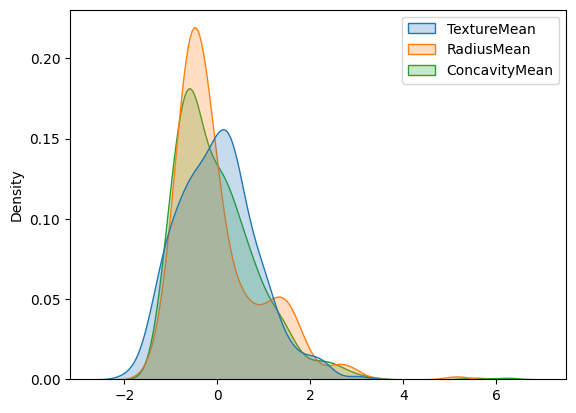

In [490]:
sns.kdeplot(df[["TextureMean", "RadiusMean", "ConcavityMean"]], fill=True)
plt.show()

También podemos explorar gráficos bivariados como los de dispersión y los jointplot que combinan dispersión con regresiones y distribuciones en una misma gráfica.

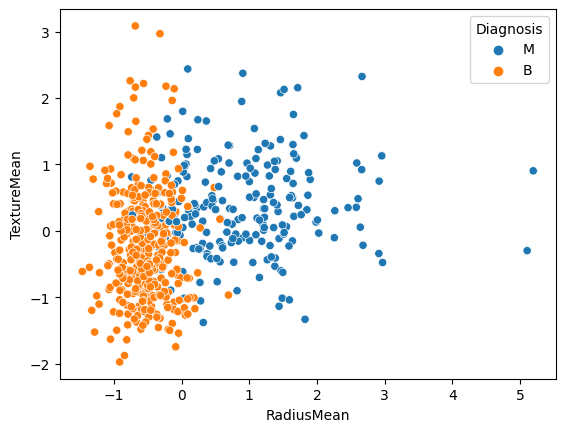

In [476]:
sns.scatterplot(x="RadiusMean", y="TextureMean", hue="Diagnosis", data=df)
plt.show()

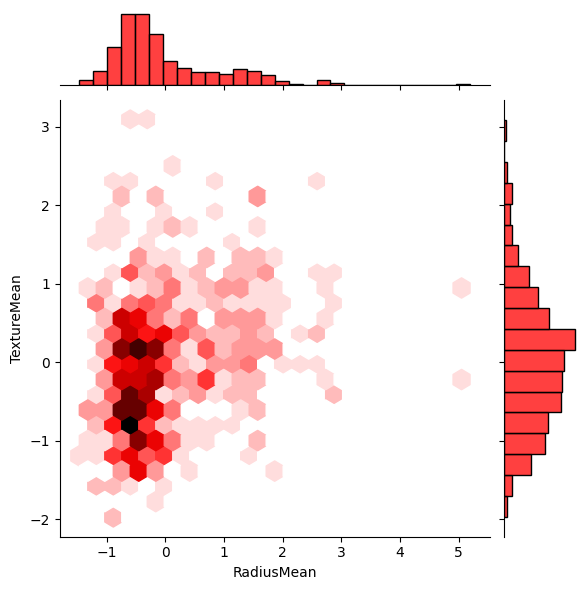

In [477]:
sns.jointplot(x="RadiusMean", y="TextureMean", data=df, kind="hex", color="red")
plt.show()

También está pairplot, que permite visualizar gráficos de dispersión de diversas características

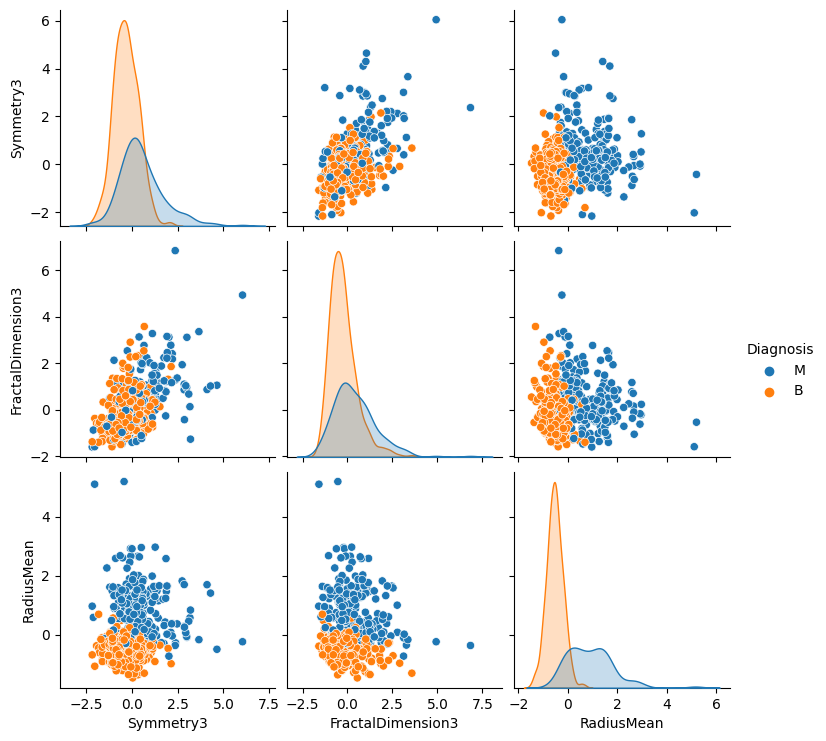

In [478]:
sns.pairplot(df.iloc[:, 0:4], hue="Diagnosis")
plt.show()

Otra opción un poco más avanzada es utilizar clustermap, sirve para detectar grupos, es decir, hacer clusters, ordenar la matriz de correlación para mostrar estructuras, explorar relaciones multivariadas, y todo esto de forma visual y rápida.

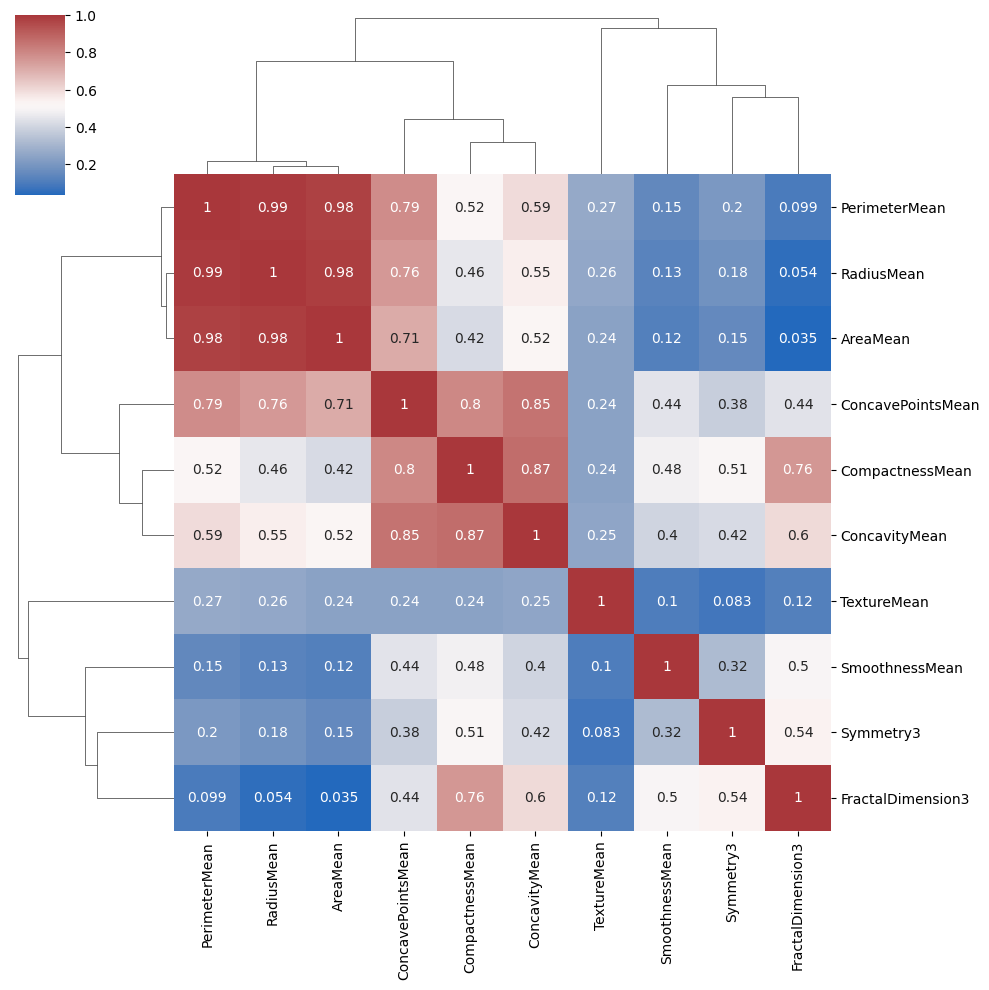

In [479]:
sns.clustermap(df.corr(), cmap="vlag", annot=True)
plt.show()